# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'], axis=1)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
label_encoder = LabelEncoder()

kategorikal_cols = df.select_dtypes(include=['object']).columns

for col in kategorikal_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.dropna(inplace=True)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.154922,1256.404921,0.788574,21.383653,1.013344,0.429323,1.532110,0.377521,0.030025,0.335330,180.984987
std,0.151893,726.716182,0.437979,12.417622,0.831075,0.287681,1.153802,0.242365,0.147059,0.262236,103.757245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093288,92.000000
50%,0.110829,1254.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.308010,181.000000
75%,0.214235,1884.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.507822,271.750000
max,1.000000,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


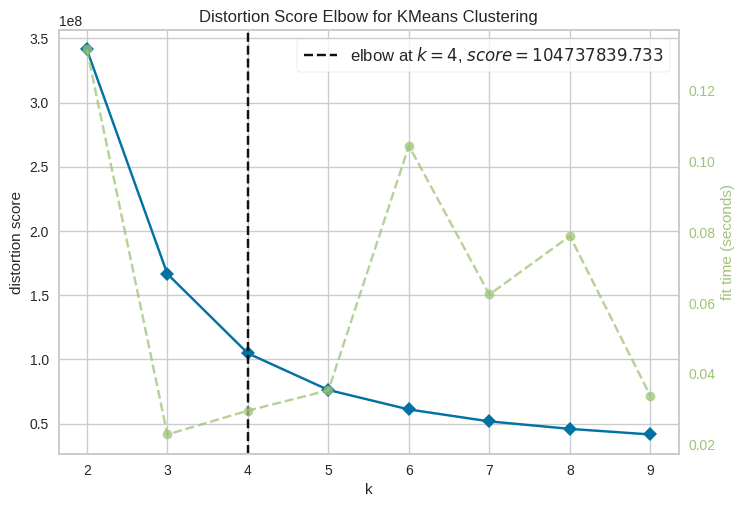

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

df['Target'] = kmeans.labels_
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,3
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,3
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,3
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,3


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [24]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
grouped = df.groupby('Target')[num_cols].agg(['mean', 'min', 'max'])
grouped

TransactionAmount                     CustomerAge            \
                    mean       min       max        mean  min  max   
Target                                                               
0               0.152530  0.000000  0.858577    0.432627  0.0  1.0   
1               0.153044  0.000313  0.953561    0.410814  0.0  1.0   
2               0.166952  0.000031  0.954092    0.440058  0.0  1.0   
3               0.147070  0.000599  1.000000    0.433515  0.0  1.0   

       TransactionDuration                LoginAttempts            \
                      mean  min       max          mean  min  max   
Target                                                              
0                 0.383541  0.0  1.000000      0.031871  0.0  1.0   
1                 0.367425  0.0  0.996552      0.037521  0.0  1.0   
2                 0.383050  0.0  0.996552      0.023632  0.0  1.0   
3                 0.375879  0.0  0.993103      0.027174  0.0  1.0   

       AccountBalance                      
                 mean       min       max  
Target                                     
0            0.344244  0.002974  1.000000  
1            0.331228  0.000064  0.997633  
2            0.330393  0.000000  0.997144  
3            0.335370  0.000377  0.995087

In [36]:
grouped.T

Target                           0         1         2         3
TransactionAmount   mean  0.152530  0.153044  0.166952  0.147070
                    min   0.000000  0.000313  0.000031  0.000599
                    max   0.858577  0.953561  0.954092  1.000000
CustomerAge         mean  0.432627  0.410814  0.440058  0.433515
                    min   0.000000  0.000000  0.000000  0.000000
                    max   1.000000  1.000000  1.000000  1.000000
TransactionDuration mean  0.383541  0.367425  0.383050  0.375879
                    min   0.000000  0.000000  0.000000  0.000000
                    max   1.000000  0.996552  0.996552  0.993103
LoginAttempts       mean  0.031871  0.037521  0.023632  0.027174
                    min   0.000000  0.000000  0.000000  0.000000
                    max   1.000000  1.000000  1.000000  1.000000
AccountBalance      mean  0.344244  0.331228  0.330393  0.335370
                    min   0.002974  0.000064  0.000000  0.000377
                    max   1.000000  0.997633  0.997144  0.995087

In [29]:
categorical_columns = df.drop(columns=num_cols)
mode_values = categorical_columns.groupby('Target').agg(lambda x: x.mode()[0])
print(mode_values)

        TransactionDate  TransactionType  Location  Channel  \
Target                                                        
0                  2485                1        13        2   
1                     0                1         4        1   
2                  1247                1        35        0   
3                   620                1         1        1   

        CustomerOccupation  PreviousTransactionDate  
Target                                               
0                        1                       75  
1                        3                      240  
2                        3                      360  
3                        3                      174  


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: ( Pengguna Umum dengan Aktivitas Stabil)**:
  - **Rata-rata (mean) Customer Age : 0.43**
  - **Rata-rata (mean) Transaction Duration : 0.38**
  - **Rata-rata (mean) Transaction Amount : 0.15**
  - **Rata-rata (mean) Login Attempts : 0.03**
  - **Rata-rata (mean) Account Balance : 0.34**
  - **Max Customer Age: 1.0000**
  - **Max Transaction Duration: 1.0000**
  - **Max Transaction Amount: 0.8586**
  - **Max Login Attempts: 1.0000**
  - **Max Account Balance: 1.0000**
  
  - **Min Customer Age: 0.000000**
  - **Min Transaction Duration: 0.000000**
  - **Min Transaction Amount: 0.000000**
  - **Min Login Attempts: 0.000000**
  - **Min Account Balance: 0.002974**

  - **Mode Transaction Date: 2485**
  - **Mode Transaction Type: 1**
  - **Mode Transaction Date: 2485**
  - **Mode Channel: 2**
  - **Mode Customer Occupation: 1**
  - **Mode Previous Transaction Date: 75**

  - **Analisis :** Cluster ini mencakup pelanggan dengan usia menengah dan aktivitas transaksi yang stabil. Mereka memiliki saldo akun yang cukup tinggi dan frekuensi login yang rendah, menunjukkan pola penggunaan yang teratur dan konservatif. Rekomendasi yang tepat adalah produk perbankan umum seperti tabungan dan kredit yang menawarkan keamanan dan kemudahan.
  
2. **Cluster 1: (Pengguna Muda dengan Aktivitas Terbatas di Channel Sederhana)**:  
  - **Rata-rata (mean) Customer Age :** 0.41  
  - **Rata-rata (mean) Transaction Duration :** 0.37  
  - **Rata-rata (mean) Transaction Amount :** 0.15  
  - **Rata-rata (mean) Login Attempts :** 0.04  
  - **Rata-rata (mean) Account Balance :** 0.33  
  
  - **Max Customer Age:** 1.0000  
  - **Max Transaction Duration:** 0.9966  
  - **Max Transaction Amount:** 0.9536  
  - **Max Login Attempts:** 1.0000  
  - **Max Account Balance:** 0.9976  
  
  - **Min Customer Age:** 0.0000  
  - **Min Transaction Duration:** 0.0000  
  - **Min Transaction Amount:** 0.0003  
  - **Min Login Attempts:** 0.0000  
  - **Min Account Balance:** 0.000064  
  
  - **Mode Transaction Date:** 0  
  - **Mode Transaction Type:** 1  
  - **Mode Location:** 4  
  - **Mode Channel:** 1  
  - **Mode Customer Occupation:** 3  
  - **Mode Previous Transaction Date:** 240  

  - **Analisis :** Cluster ini berisi pelanggan muda dengan aktivitas transaksi yang terbatas dan menggunakan channel sederhana. Mereka cenderung baru mengenal layanan perbankan digital dan kurang aktif bertransaksi. Oleh karena itu, edukasi digital dan produk dasar yang mudah diakses perlu ditawarkan untuk meningkatkan keterlibatan mereka.

3. **Cluster 2: (Pengguna Aktif di Lokasi Beragam dengan Frekuensi Transaksi Tinggi)**:  
  - **Rata-rata (mean) Customer Age :** 0.44  
  - **Rata-rata (mean) Transaction Duration :** 0.38  
  - **Rata-rata (mean) Transaction Amount :** 0.17  
  - **Rata-rata (mean) Login Attempts :** 0.02  
  - **Rata-rata (mean) Account Balance :** 0.33  
  
  - **Max Customer Age:** 1.0000  
  - **Max Transaction Duration:** 0.9966  
  - **Max Transaction Amount:** 0.9541  
  - **Max Login Attempts:** 1.0000  
  - **Max Account Balance:** 0.9971  
  
  - **Min Customer Age:** 0.0000  
  - **Min Transaction Duration:** 0.0000  
  - **Min Transaction Amount:** 0.0000  
  - **Min Login Attempts:** 0.0000  
  - **Min Account Balance:** 0.000000  
  
  - **Mode Transaction Date:** 1247  
  - **Mode Transaction Type:** 1  
  - **Mode Location:** 35  
  - **Mode Channel:** 0  
  - **Mode Customer Occupation:** 3  
  - **Mode Previous Transaction Date:** 360  

  - **Analisis :** Cluster ini mewakili pelanggan yang sangat aktif dengan usia rata-rata lebih tinggi, melakukan transaksi di banyak lokasi dan channel. Mereka menunjukkan daya beli yang kuat dan loyalitas tinggi. Produk investasi dan layanan premium dengan fitur keamanan tambahan sangat cocok untuk kelompok ini.



4. **Cluster 3: (Pengguna dengan Saldo Cukup dan Durasi Transaksi Singkat)**:  
  - **Rata-rata (mean) Customer Age :** 0.43  
  - **Rata-rata (mean) Transaction Duration :** 0.38  
  - **Rata-rata (mean) Transaction Amount :** 0.15  
  - **Rata-rata (mean) Login Attempts :** 0.03  
  - **Rata-rata (mean) Account Balance :** 0.34  
  
  - **Max Customer Age:** 1.0000  
  - **Max Transaction Duration:** 0.9931  
  - **Max Transaction Amount:** 1.0000  
  - **Max Login Attempts:** 1.0000  
  - **Max Account Balance:** 0.9951  
  
  - **Min Customer Age:** 0.0000  
  - **Min Transaction Duration:** 0.0000  
  - **Min Transaction Amount:** 0.0006  
  - **Min Login Attempts:** 0.0000  
  - **Min Account Balance:** 0.000377  
  
  - **Mode Transaction Date:** 620  
  - **Mode Transaction Type:** 1  
  - **Mode Location:** 1  
  - **Mode Channel:** 1  
  - **Mode Customer Occupation:** 3  
  - **Mode Previous Transaction Date:** 174

  - **Analisis :** Cluster ini terdiri dari pelanggan dengan saldo cukup dan durasi transaksi yang singkat. Mereka lebih memilih transaksi cepat dan efisien melalui channel terbatas. Produk pembayaran cepat, kartu debit dengan cashback, dan layanan transaksi harian yang mudah diakses adalah rekomendasi terbaik untuk cluster ini.
  
  <Sebelum inverse>
  
  <Setelah inverse>


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [30]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [31]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [32]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [33]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [35]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)